# Creating a timeline with lines, dates, and text


https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py


How to create a simple timeline using Matplotlib release dates.

Timelines can be created with a collection of dates and text. In this example, we show how to create a simple timeline using the dates for recent releases of Matplotlib. First, we’ll pull the data from GitHub.




In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

# A list of Matplotlib releases and their dates
# Taken from https://api.github.com/repos/matplotlib/matplotlib/releases
names = ['v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0', 'v2.0.2',
         'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1', 'v1.5.0', 'v1.4.3',
         'v1.4.2', 'v1.4.1', 'v1.4.0']

dates = ['2018-03-17T03:00:07Z', '2018-03-16T22:06:39Z',
         '2018-03-06T12:53:32Z', '2018-01-18T04:56:47Z',
         '2017-12-10T04:47:38Z', '2017-10-07T22:35:12Z',
         '2017-05-10T02:11:15Z', '2017-05-02T01:59:49Z',
         '2017-01-17T02:59:36Z', '2016-09-09T03:00:52Z',
         '2016-07-03T15:52:01Z', '2016-01-10T22:38:50Z',
         '2015-10-29T21:40:23Z', '2015-02-16T04:22:54Z',
         '2014-10-26T03:24:13Z', '2014-10-18T18:56:23Z',
         '2014-08-26T21:06:04Z']
dates = [datetime.strptime(ii, "%Y-%m-%dT%H:%M:%SZ") for ii in dates]

Next, we’ll iterate through each date and plot it on a horizontal line. We’ll add some styling to the text so that overlaps aren’t as strong.

Note that Matplotlib will automatically plot datetime inputs.

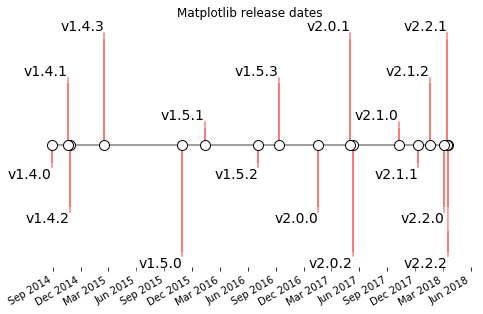

In [4]:
levels = np.array([-5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(8, 5))

# Create the base line
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# Iterate through releases annotating each one
for ii, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    # Give the text a faint background and align it properly
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Matplotlib release dates")
# Set the xticks formatting
# format xaxis with 3 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
plt.show()